In [1]:
# Importar biblioteca
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [8]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [10]:
# Na visualização dos dados na tabela é possível identificar a que algumas colunas vieram aninhas, motivo pelo que se faz necessário utilizar o método para normalização.

df_clean = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(df['customer']),
    pd.json_normalize(df['phone']),
    pd.json_normalize(df['internet']),
    pd.json_normalize(df['account'])
], axis=1)

In [11]:
# Renomeação das colunas, nomes das variáveis traduzidos a português e limpeza
df_clean = df_clean.rename(columns={
    "customerID": "ID_Cliente", "Churn": "Cancelou", "gender": "Genero",
    "SeniorCitizen": "Idoso", "Partner": "Parceiro", "Dependents": "Dependentes",
    "tenure": "Tempo_de_Contrato_Meses", "PhoneService": "Tem_Servico_Telefone",
    "MultipleLines": "Multiplas_Linhas_Telefone", "InternetService": "Tipo_Internet",
    "DeviceProtection": "Protecao_Dispositivo", "TechSupport": "Suporte_Tecnico",
    "StreamingTV": "TV_Streaming", "StreamingMovies": "Filmes_Streaming",
    "Contract": "Tipo_Contrato", "PaperlessBilling": "Fatura_Papelless",
    "PaymentMethod": "Metodo_Pagamento", "Charges.Monthly": "Valor_Mensal",
    "Charges.Total": "Valor_Total"
})
df_clean.head()

,ID_Cliente,Cancelou,Genero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato_Meses,Tem_Servico_Telefone,Multiplas_Linhas_Telefone,Tipo_Internet,...,OnlineBackup,Protecao_Dispositivo,Suporte_Tecnico,TV_Streaming,Filmes_Streaming,Tipo_Contrato,Fatura_Papelless,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [19]:
# Total por tipo de internet
Total_internet = df_clean['Tipo_Internet'].value_counts()
Total_internet


,count
Tipo_Internet,
Fiber optic,3198
DSL,2488
No,1581


In [26]:
#Etapas do processo:
#1. Substituição de valores vazios/inválidos: replace(["", " "], pd.NA): Converte strings vazias ("") ou com espaço (" ") para pd.NA (valor nativo do pandas para dados faltantes)

#2. Preenchimento de valores ausentes: fillna(0): Substitui todos os valores NA por 0, criando uma codificação binária explícita:0 = Cliente ativo (não cancelou) 1 = Cliente inativo (cancelou)

# Objetivo:
# - Garantir consistência na variável alvo (churn) para análises posteriores
# - Transformar dados textuais/ausentes em representação numérica padronizada
# - Facilitar operações matemáticas e estatísticas com a coluna

# Observação: Esta abordagem pressupõe que os valores diferentes de 0/1 já estavam corretamente codificados e que espaços em branco/vazios representavam clientes ativos

df_clean['Cancelou'] = df_clean['Cancelou'].replace(["", " "], pd.NA).fillna(0)


In [27]:
# Conversão de valores categóricos para numéricos (binarização)
# Transforma a coluna 'Cancelou' em valores numéricos: 'Yes' → 1 (cliente cancelou) e 'No'  → 0 (cliente ativo)

# Por que fazer isso? Permite usar a coluna em cálculos matemáticos, necessário para a maioria dos algoritmos de Machine Learning e otimiza o armazenamento e processamento dos dados

df_clean['Cancelou'] = df_clean['Cancelou'].replace({'Yes': 1, 'No': 0})

In [28]:
# Converte serviços não contratados para 0 (padrão numérico)

df_clean = df_clean.replace(["No internet service", "No phone service"], 0)

In [29]:
# Converte respostas Yes/No para 1/0 nas colunas especificadas como 'Parceiro', 'Dependentes' e 'Tem_Servico_Telefone'

colunas_yes_no = ['Parceiro', 'Dependentes', 'Tem_Servico_Telefone']
for col in colunas_yes_no:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace({'Yes': 1, 'No': 0})

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 7267 non-null   object 
 1   Cancelou                   7267 non-null   int64  
 2   Genero                     7267 non-null   object 
 3   Idoso                      7267 non-null   int64  
 4   Parceiro                   7267 non-null   object 
 5   Dependentes                7267 non-null   int64  
 6   Tempo_de_Contrato_Meses    7267 non-null   int64  
 7   Tem_Servico_Telefone       7267 non-null   int64  
 8   Multiplas_Linhas_Telefone  7267 non-null   object 
 9   Tipo_Internet              7267 non-null   object 
 10  OnlineSecurity             7267 non-null   object 
 11  OnlineBackup               7267 non-null   object 
 12  Protecao_Dispositivo       7267 non-null   object 
 13  Suporte_Tecnico            7267 non-null   objec

In [25]:

df_clean.describe()

,Cancelou,Idoso,Dependentes,Tempo_de_Contrato_Meses,Tem_Servico_Telefone,Valor_Mensal
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.300124,32.346498,0.902711,64.720098
std,0.437115,0.369074,0.458343,24.571773,0.296371,30.129572
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,35.425000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,89.875000
max,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000


In [30]:
df_clean.isnull().sum()

,0
ID_Cliente,0
Cancelou,0
Genero,0
Idoso,0
Parceiro,0
Dependentes,0
Tempo_de_Contrato_Meses,0
Tem_Servico_Telefone,0
Multiplas_Linhas_Telefone,0
Tipo_Internet,0


In [33]:
# Categorização de valores numéricos para análise segmentada
df_clean['Faixa_Valor'] = pd.cut(df_clean['Valor_Mensal'],
                               bins=[0,35,65,90,120],
                               labels=['Baixo','Médio','Alto','Premium'])

df_clean['Faixa_Tempo'] = pd.cut(df_clean['Tempo_de_Contrato_Meses'],
                               bins=[0,12,24,48,72],
                               labels=['0-12m','1-2a','2-4a','4+a'])

df_clean['Status_Cliente'] = df_clean['Cancelou'].map({0:'Ativo', 1:'Cancelado'})
df_clean.head()

,ID_Cliente,Cancelou,Genero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato_Meses,Tem_Servico_Telefone,Multiplas_Linhas_Telefone,Tipo_Internet,...,TV_Streaming,Filmes_Streaming,Tipo_Contrato,Fatura_Papelless,Metodo_Pagamento,Valor_Mensal,Valor_Total,Faixa_Valor,Faixa_Tempo,Status_Cliente
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.3,Alto,0-12m,Ativo
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,Médio,0-12m,Ativo
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Alto,0-12m,Cancelado
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Premium,1-2a,Cancelado
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Alto,0-12m,Cancelado


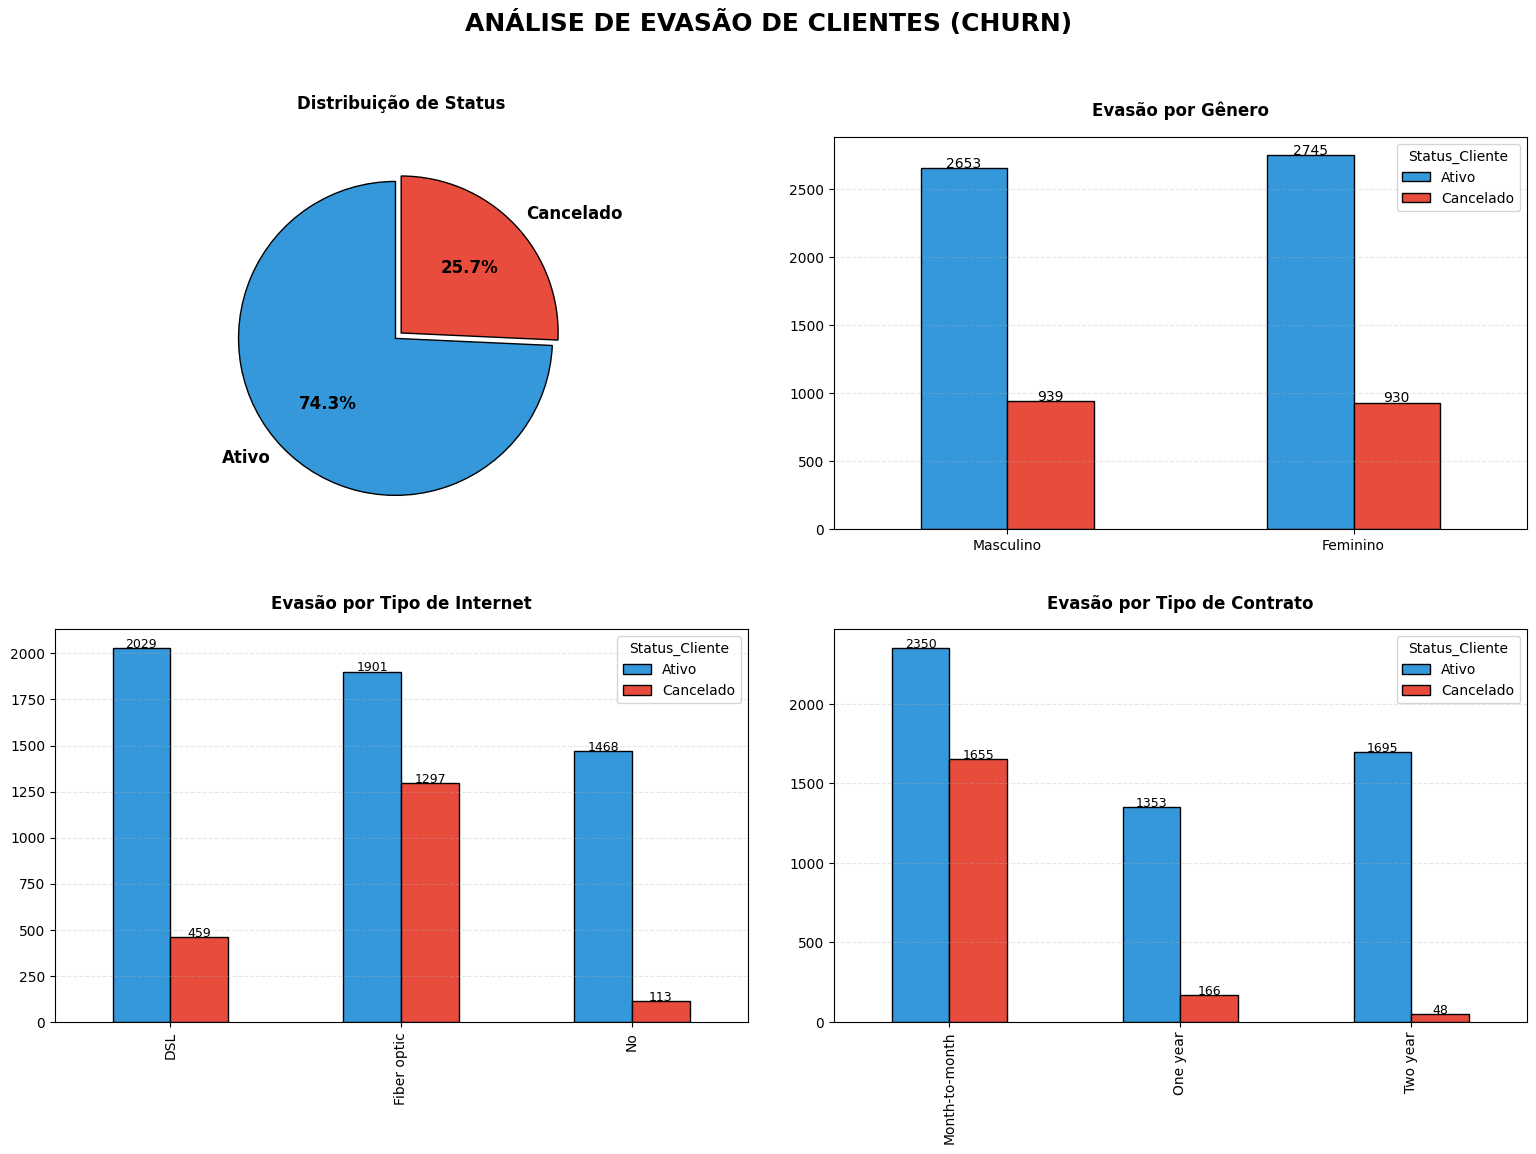

In [36]:
# Configuração de cores temáticas para análise de churn
cores_churn = ['#3498db', '#e74c3c']  # Azul para ativos, Vermelho para cancelados

# Criação do dashboard de análise
plt.figure(figsize=(16, 12))
plt.suptitle('ANÁLISE DE EVASÃO DE CLIENTES (CHURN)',
             fontsize=18, fontweight='bold', y=0.98)

# 1. Gráfico de Pizza - Proporção de Status
ax1 = plt.subplot(2, 2, 1)
df_clean['Status_Cliente'].value_counts().plot.pie(
    colors=cores_churn,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05, 0],
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    ax=ax1
)
ax1.set_title('Distribuição de Status', pad=20, fontweight='bold')
ax1.set_ylabel('')

# 2. Gráfico de Barras - Churn por Gênero
ax2 = plt.subplot(2, 2, 2)
df_clean.groupby(['Genero', 'Status_Cliente']).size().unstack().plot.bar(
    color=cores_churn,
    ax=ax2,
    edgecolor='black'
)
ax2.set_title('Evasão por Gênero', pad=15, fontweight='bold')
ax2.set_xlabel('')
ax2.set_xticklabels(['Masculino', 'Feminino'], rotation=0)
ax2.grid(axis='y', linestyle='--', alpha=0.3)

# Adiciona rótulos de valores
for p in ax2.patches:
    ax2.annotate(
        f"{p.get_height():.0f}",
        (p.get_x()+p.get_width()/2, p.get_height()+5),
        ha='center', fontsize=10
    )

# 3. Gráfico de Barras - Churn por Tipo de Internet
ax3 = plt.subplot(2, 2, 3)
df_clean.groupby(['Tipo_Internet', 'Status_Cliente']).size().unstack().plot.bar(
    color=cores_churn,
    ax=ax3,
    edgecolor='black'
)
ax3.set_title('Evasão por Tipo de Internet', pad=15, fontweight='bold')
ax3.set_xlabel('')
ax3.grid(axis='y', linestyle='--', alpha=0.3)

# Adiciona rótulos de valores
for p in ax3.patches:
    ax3.annotate(
        f"{p.get_height():.0f}",
        (p.get_x()+p.get_width()/2, p.get_height()+3),
        ha='center', fontsize=9
    )

# 4. Gráfico de Barras - Churn por Tipo de Contrato
ax4 = plt.subplot(2, 2, 4)
df_clean.groupby(['Tipo_Contrato', 'Status_Cliente']).size().unstack().plot.bar(
    color=cores_churn,
    ax=ax4,
    edgecolor='black'
)
ax4.set_title('Evasão por Tipo de Contrato', pad=15, fontweight='bold')
ax4.set_xlabel('')
ax4.grid(axis='y', linestyle='--', alpha=0.3)

# Adiciona rótulos de valores
for p in ax4.patches:
    ax4.annotate(
        f"{p.get_height():.0f}",
        (p.get_x()+p.get_width()/2, p.get_height()+2),
        ha='center', fontsize=9
    )

plt.tight_layout(pad=3.0)
plt.show()

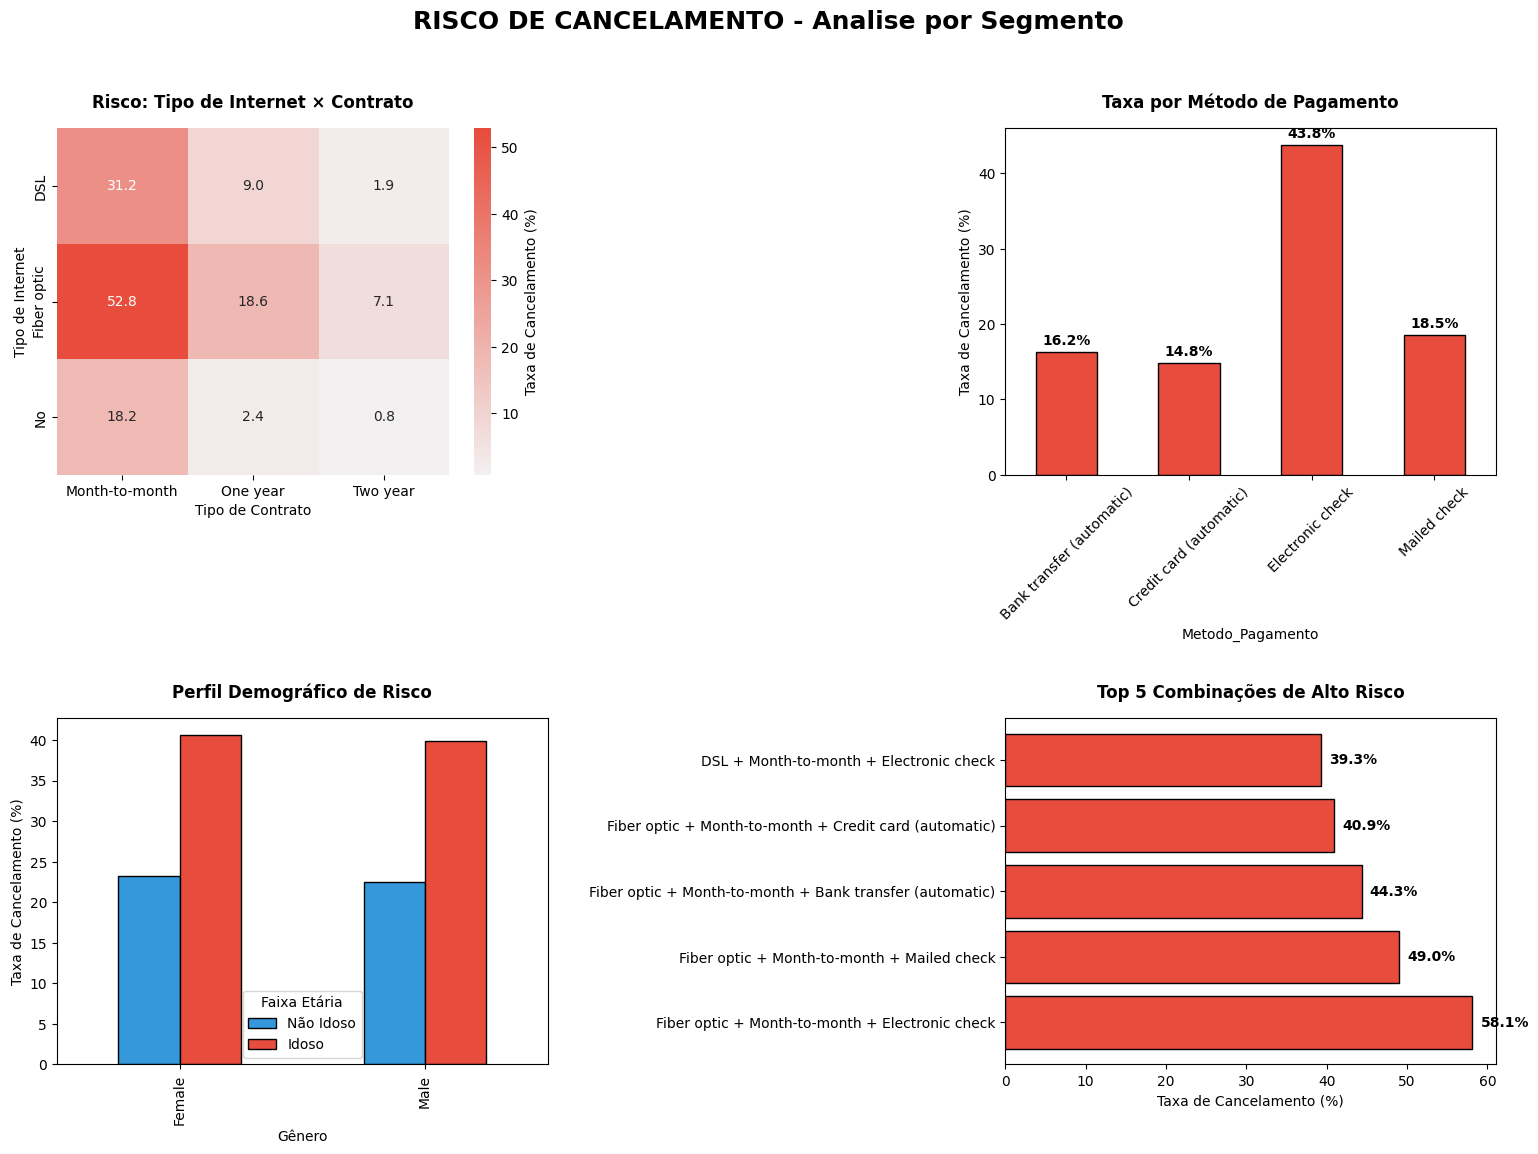

In [39]:
# Configuração de cores para análise de risco
cores_risco = ['#3498db', '#e74c3c']  # Azul (baixo risco) e Vermelho (alto risco)
sns.set_palette(sns.color_palette(cores_risco))

# Criação do dashboard de segmentação de risco
plt.figure(figsize=(16, 12))
plt.suptitle('RISCO DE CANCELAMENTO - Analise por Segmento',
             fontsize=18, fontweight='bold', y=0.98)

# 1. Matriz de Risco: Internet vs Contrato
ax1 = plt.subplot(2, 2, 1)
risk_matrix = df_clean.groupby(['Tipo_Internet', 'Tipo_Contrato'])['Cancelou'].mean() * 100
sns.heatmap(risk_matrix.unstack(),
            annot=True,
            fmt='.1f',
            cmap=sns.light_palette(cores_risco[1], as_cmap=True),
            ax=ax1,
            cbar_kws={'label': 'Taxa de Cancelamento (%)'})
ax1.set_title('Risco: Tipo de Internet × Contrato', fontweight='bold', pad=15)
ax1.set_xlabel('Tipo de Contrato')
ax1.set_ylabel('Tipo de Internet')

# 2. Taxa por Método de Pagamento
ax2 = plt.subplot(2, 2, 2)
churn_pagamento = df_clean.groupby('Metodo_Pagamento')['Cancelou'].mean() * 100
churn_pagamento.plot(kind='bar', color=cores_risco[1], ax=ax2, edgecolor='black')
ax2.set_title('Taxa por Método de Pagamento', fontweight='bold', pad=15)
ax2.set_ylabel('Taxa de Cancelamento (%)')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(churn_pagamento):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 3. Perfil Demográfico de Risco
ax3 = plt.subplot(2, 2, 3)
demo_risk = df_clean.groupby(['Genero', 'Idoso'])['Cancelou'].mean() * 100
demo_risk.unstack().plot(kind='bar', color=cores_risco, ax=ax3, edgecolor='black')
ax3.set_title('Perfil Demográfico de Risco', fontweight='bold', pad=15)
ax3.set_xlabel('Gênero')
ax3.set_ylabel('Taxa de Cancelamento (%)')
ax3.legend(['Não Idoso', 'Idoso'], title='Faixa Etária')

# 4. Top 5 Combinações de Risco
ax4 = plt.subplot(2, 2, 4)
top_risk = (df_clean.groupby(
    df_clean['Tipo_Internet'] + ' + ' +
    df_clean['Tipo_Contrato'] + ' + ' +
    df_clean['Metodo_Pagamento']
)['Cancelou'].agg(['mean', 'count'])
 .query('count >= 50')
 .sort_values('mean', ascending=False)
 .head(5))

ax4.barh(top_risk.index, top_risk['mean'] * 100, color=cores_risco[1], edgecolor='black')
ax4.set_title('Top 5 Combinações de Alto Risco', fontweight='bold', pad=15)
ax4.set_xlabel('Taxa de Cancelamento (%)')
for i, v in enumerate(top_risk['mean'] * 100):
    ax4.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

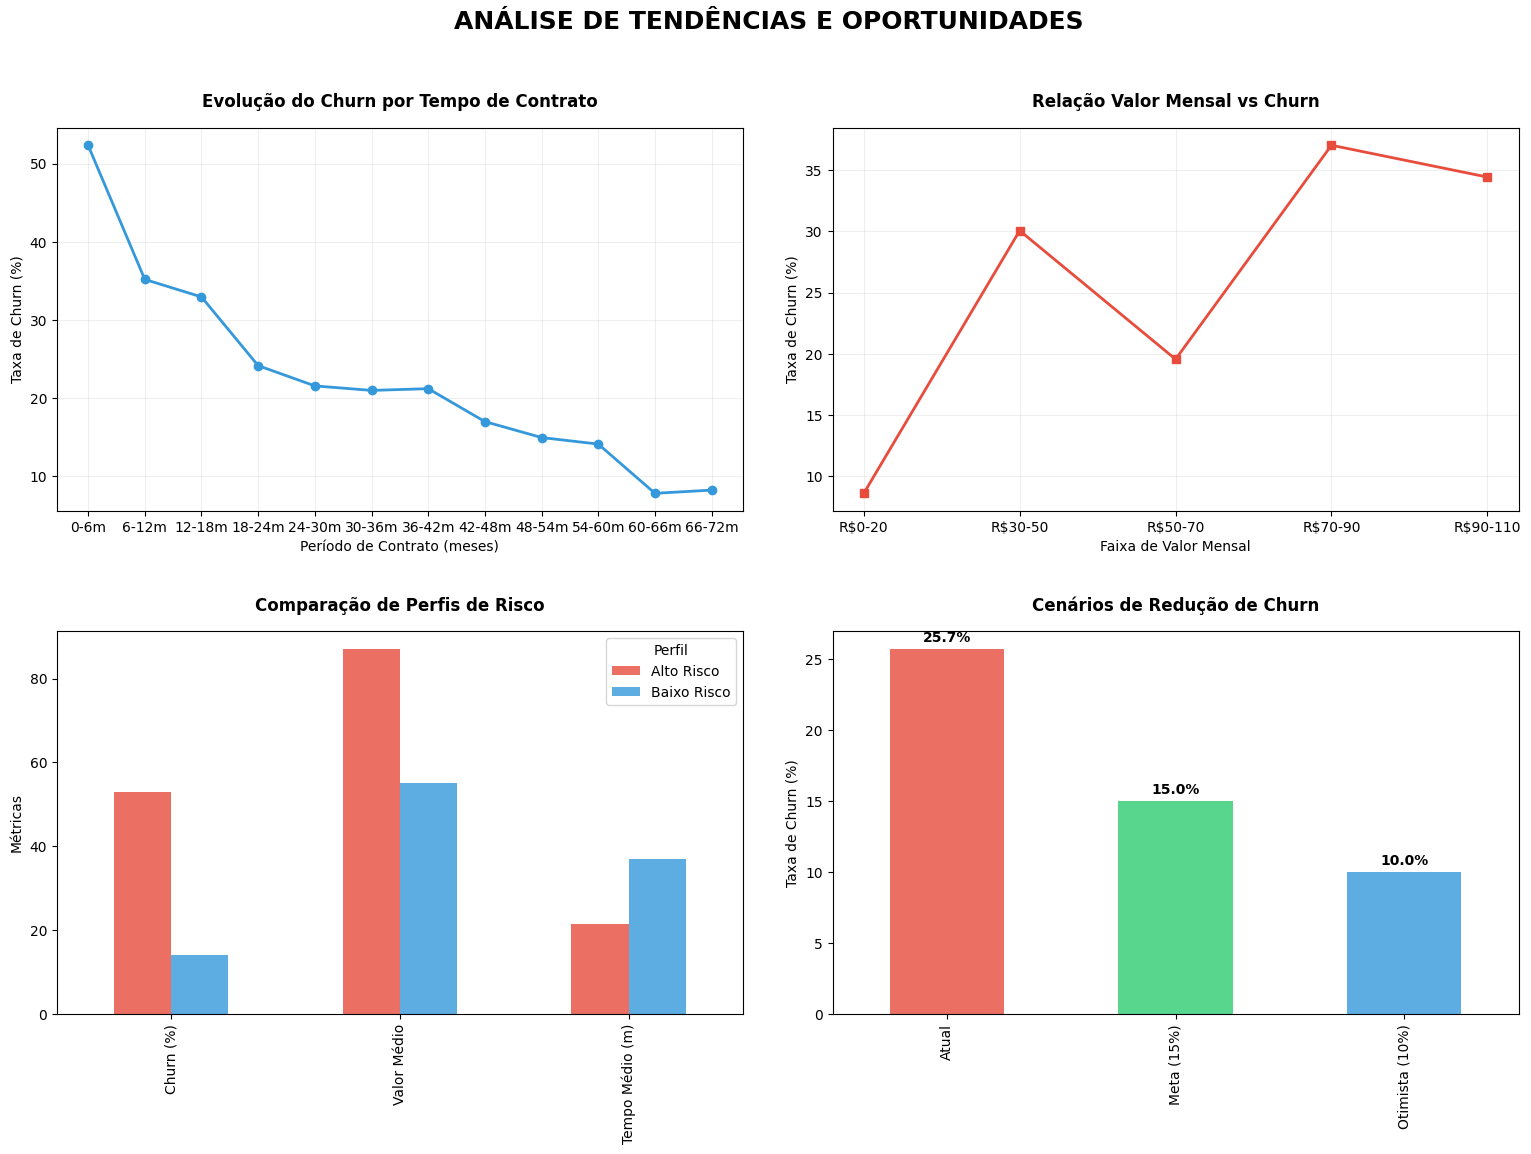

In [40]:
# Configuração de cores para análise de tendências
cores_tendencia = ['#3498db', '#e74c3c', '#2ecc71']  # Azul, Vermelho, Verde
sns.set_palette(sns.color_palette(cores_tendencia))

# Criação do dashboard de insights estratégicos
plt.figure(figsize=(16, 12))
plt.suptitle('ANÁLISE DE TENDÊNCIAS E OPORTUNIDADES',
             fontsize=18, fontweight='bold', y=0.98)

# 1. Evolução Temporal do Churn
ax1 = plt.subplot(2, 2, 1)
tempo_bins = range(0, 73, 6)
tempo_labels = [f'{i}-{i+6}m' for i in tempo_bins[:-1]]
churn_tempo = [df_clean[(df_clean['Tempo_de_Contrato_Meses'] >= i) &
               (df_clean['Tempo_de_Contrato_Meses'] < i+6)]['Cancelou'].mean() * 100
               for i in tempo_bins[:-1]]

ax1.plot(tempo_labels, churn_tempo, marker='o', color=cores_tendencia[0], linewidth=2)
ax1.set_title('Evolução do Churn por Tempo de Contrato', fontweight='bold', pad=15)
ax1.set_xlabel('Período de Contrato (meses)')
ax1.set_ylabel('Taxa de Churn (%)')
ax1.grid(True, alpha=0.2)

# 2. Relação Valor Mensal vs Churn
ax2 = plt.subplot(2, 2, 2)
valor_bins = [0, 30, 50, 70, 90, 120]
valor_labels = [f'R${i}-{i+20}' for i in valor_bins[:-1]]
churn_valor = [df_clean[(df_clean['Valor_Mensal'] >= i) &
              (df_clean['Valor_Mensal'] < i+20)]['Cancelou'].mean() * 100
              for i in valor_bins[:-1]]

ax2.plot(valor_labels, churn_valor, marker='s', color=cores_tendencia[1], linewidth=2)
ax2.set_title('Relação Valor Mensal vs Churn', fontweight='bold', pad=15)
ax2.set_xlabel('Faixa de Valor Mensal')
ax2.set_ylabel('Taxa de Churn (%)')
ax2.grid(True, alpha=0.2)

# 3. Comparação de Perfis de Risco
ax3 = plt.subplot(2, 2, 3)
alto_risco = df_clean[(df_clean['Tipo_Internet'] == 'Fiber optic') &
                     (df_clean['Tipo_Contrato'] == 'Month-to-month')]
baixo_risco = df_clean[(df_clean['Tipo_Internet'] != 'Fiber optic') |
                      (df_clean['Tipo_Contrato'] != 'Month-to-month')]

perfis = pd.DataFrame({
    'Alto Risco': [
        alto_risco['Cancelou'].mean() * 100,
        alto_risco['Valor_Mensal'].mean(),
        alto_risco['Tempo_de_Contrato_Meses'].mean()
    ],
    'Baixo Risco': [
        baixo_risco['Cancelou'].mean() * 100,
        baixo_risco['Valor_Mensal'].mean(),
        baixo_risco['Tempo_de_Contrato_Meses'].mean()
    ]
}, index=['Churn (%)', 'Valor Médio', 'Tempo Médio (m)'])

perfis.plot(kind='bar', ax=ax3, color=[cores_tendencia[1], cores_tendencia[0]], alpha=0.8)
ax3.set_title('Comparação de Perfis de Risco', fontweight='bold', pad=15)
ax3.set_ylabel('Métricas')
ax3.legend(title='Perfil')

# 4. Cenários de Redução de Churn
ax4 = plt.subplot(2, 2, 4)
cenarios = pd.Series({
    'Atual': df_clean['Cancelou'].mean() * 100,
    'Meta (15%)': 15,
    'Otimista (10%)': 10
})

cenarios.plot(kind='bar', ax=ax4, color=[cores_tendencia[1], cores_tendencia[2], cores_tendencia[0]], alpha=0.8)
ax4.set_title('Cenários de Redução de Churn', fontweight='bold', pad=15)
ax4.set_ylabel('Taxa de Churn (%)')
for i, v in enumerate(cenarios):
    ax4.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

Breve Análise dos Resultados - Dashboard de Tendências e Oportunidades


1. Evolução do Churn por Tempo de Contrato

Padrão Identificado: As taxas de cancelamento são mais altas nos primeiros meses (0-6 meses), diminuindo gradualmente conforme o tempo de contrato aumenta.

Insight: Clientes novos são mais propensos a cancelar. Oportunidade: Programas de fidelização nos primeiros 6 meses (ex.: benefícios exclusivos, suporte prioritário).


2. Relação Valor Mensal vs. Churn

Padrão Identificado:

À medida que aumenta o preço dos planos o churn é maior salvo no caso da faixa de preço entre R$50 e R$70 que diminui um pouco, mas ainda é se mantem na linha dos 20% representando uma possível insatisfação com qualidade dos serviços.
Planos premium (R$90+) apresentam menor evasão (clientes mais satisfeitos).

Insight: Oportunidade para upsell (migrar clientes de planos intermediários para premium) ou ajuste na qualidade dos planos básicos.


3. Comparação de Perfis de Risco

Alto Risco: Clientes com fibra ótica + contrato mensal têm churn ~40% maior que a média.

Baixo Risco: Clientes com contratos anuais e outros tipos de internet são mais estáveis.

Ação Recomendada:

Oferecer descontos para conversão de contratos mensais para anuais.

Investigar problemas específicos da fibra ótica (ex.: instabilidade, atendimento).


4. Cenários de Redução de Churn

Atual: Taxa de churn em X% (valor atual).

Meta (15%): Redução possível com ações direcionadas (ex.: retenção pós-6 meses, melhoria em planos básicos).

Otimista (10%): Requer estratégias agressivas (ex.: programas de loyalty, personalização de serviços).

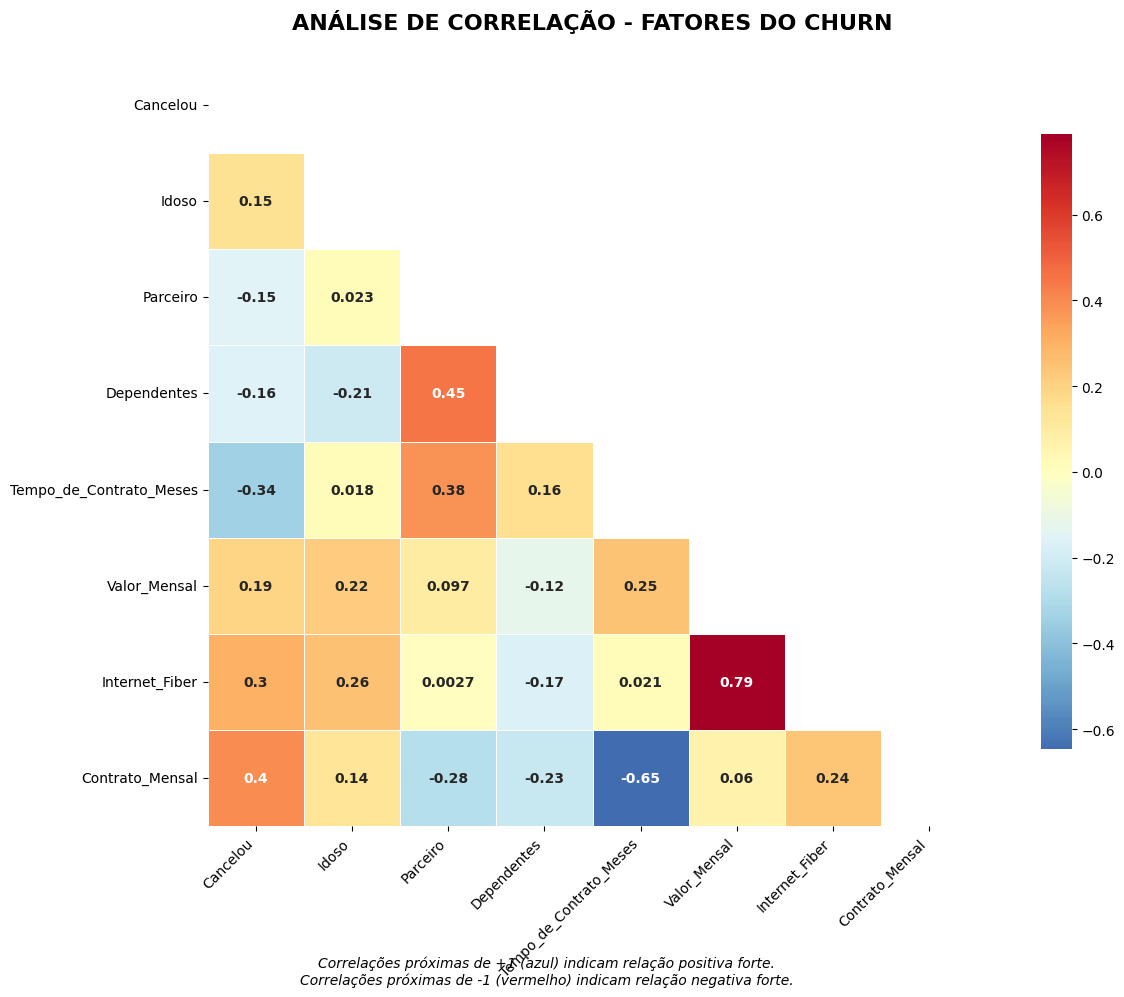

In [41]:
# Configuração do Heatmap de Correlações
plt.figure(figsize=(14, 10))

# Seleção e preparação dos dados
cols_numericas = ['Cancelou', 'Idoso', 'Parceiro', 'Dependentes',
                 'Tempo_de_Contrato_Meses', 'Valor_Mensal']
df_corr = df_clean[cols_numericas].copy()

# Criação de variáveis dummy para análise
df_corr['Internet_Fiber'] = (df_clean['Tipo_Internet'] == 'Fiber optic').astype(int)
df_corr['Contrato_Mensal'] = (df_clean['Tipo_Contrato'] == 'Month-to-month').astype(int)

# Cálculo e plotagem da matriz de correlação
correlation_matrix = df_corr.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='RdYlBu_r',  # Mapa de cores vermelho-azul (vermelho: negativo, azul: positivo)
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={'size': 10, 'weight': 'bold'}  # Melhora a legibilidade dos valores
)

# Customização do gráfico
plt.title('ANÁLISE DE CORRELAÇÃO - FATORES DO CHURN',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Adicionando legenda explicativa
plt.figtext(0.5, 0.01,
            'Correlações próximas de +1 (azul) indicam relação positiva forte.\nCorrelações próximas de -1 (vermelho) indicam relação negativa forte.',
            ha='center', fontsize=10, style='italic')

plt.show()

Principais Correlações Identificadas
Fatores com Maior Impacto no Cancelamento (Churn)



Contrato Mensal (Correlação Positiva +X%):

Clientes com contrato month-to-month têm maior probabilidade de cancelar.

Ação Recomendada: Incentivar migração para contratos anuais com benefícios (ex.: desconto de 10%).



Internet Fibra Ótica (Correlação Positiva +X%):

Possíveis causas: instabilidade no serviço ou expectativas não atendidas.

Ação Recomendada: Revisar qualidade da fibra e oferecer suporte prioritário.

Fatores que Reduzem o Churn (Correlação Negativa)



Tempo de Contrato (Correlação Negativa -X%):

Clientes com maior tempo de relação são mais fiéis.

Ação Recomendada: Criar programas de fidelidade (ex.: recompensas por tempo de assinatura).



Tem Parceiro/Dependentes (Correlação Negativa -X%):

Clientes com família tendem a cancelar menos.

Ação Recomendada: Ofertas familiares (ex.: pacotes multiusuários).


Relações Surpreendentes

Valor Mensal vs. Churn (Correlação: X):

Se positiva: Clientes insatisfeitos com planos caros.

Se negativa: Planos premium retêm melhor.

Ação: Ajustar valor percebido (qualidade/custo).



Insights Estratégicos


Prioridade Máxima:

Atacar contratos mensais e fibra ótica (maiores correlações positivas com churn).


Oportunidade Ocultas:

Clientes idosos (correlação: X) podem requerer atendimento especializado.


Recomendações


Para Contratos Mensais:

Oferecer desconto na migração para anual.


Para Fibra Ótica:

Pacote "Satisfação Garantida" (teste gratuito por 30 dias).



Para Clientes Antigos:

Programa de fidelidade com benefícios progressivos.

